<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [5]:
#Start Here
data_path = "data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv"

In [9]:
import pandas as pd

reviews_df = pd.read_csv(data_path)
reviews_df.shape

(28332, 24)

In [16]:
aaa_batt_df = reviews_df[reviews_df['name'] == "AmazonBasics AAA Performance Alkaline Batteries (36 Count)"]

In [17]:
aaa_batt_df.shape

(8343, 24)

In [21]:
pd.set_option('display.max_colwidth', -1)

/Users/axel/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [22]:
aaa_batt_df["reviews.text"].head(10)

0    I order 3 of them and one of the item is bad quality. Is missing backup spring so I have to put a pcs of aluminum to make the battery work.                                                                                                                               
1    Bulk is always the less expensive way to go for products like these                                                                                                                                                                                                       
2    Well they are not Duracell but for the price i am happy.                                                                                                                                                                                                                  
3    Seem to work as well as name brand batteries at a much better price                                                                                                                

In [24]:
import spacy

nlp = spacy.load("en_core_web_lg")

In [25]:
tokens = []

for doc in nlp.pipe(aaa_batt_df["reviews.text"]):
    doc_tokens = []
    for token in doc:
        if ((token.is_stop != True) and (token.pos_ != 'PRON') and (token.is_punct != True)):
            doc_tokens.append(token.lemma_.strip())
            
    tokens.append(doc_tokens)

In [27]:
len(tokens) == aaa_batt_df.shape[0]

True

In [28]:
tokens[0]

['order',
 '3',
 'item',
 'bad',
 'quality',
 'miss',
 'backup',
 'spring',
 'pc',
 'aluminum',
 'battery',
 'work']

In [29]:
import gensim

from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore

In [31]:
id2word = corpora.Dictionary(tokens)

In [32]:
len(id2word.keys())

4761

In [33]:
id2word.filter_extremes(no_below=5, no_above=.95)

In [34]:
len(id2word.keys())

1138

In [35]:
corpora = [id2word.doc2bow(doc) for doc in tokens]

In [36]:
corpora[5]

[(3, 2),
 (17, 2),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 2),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 2),
 (34, 1),
 (35, 1)]

In [37]:
lda = LdaMulticore(corpus=corpora,
                  id2word=id2word,
                  num_topics=15,
                  passes=10)

In [38]:
lda.print_topics()

[(0,
  '0.090*"battery" + 0.036*"package" + 0.028*"box" + 0.026*"come" + 0.019*"good" + 0.017*"price" + 0.015*"pack" + 0.015*"easy" + 0.014*"open" + 0.014*"use"'),
 (1,
  '0.174*"great" + 0.089*"value" + 0.073*"work" + 0.070*"battery" + 0.037*"product" + 0.036*"buy" + 0.019*"excellent" + 0.016*"thank" + 0.016*"Amazon" + 0.015*"far"'),
 (2,
  '0.092*"battery" + 0.058*"leak" + 0.044*"bad" + 0.024*"problem" + 0.022*"brand" + 0.021*"not" + 0.018*"performance" + 0.018*"buy" + 0.017*"time" + 0.016*"device"'),
 (3,
  '0.250*"good" + 0.100*"battery" + 0.079*"price" + 0.050*"brand" + 0.037*"far" + 0.031*"work" + 0.029*"buy" + 0.021*"long" + 0.017*"deal" + 0.017*"time"'),
 (4,
  '0.101*"battery" + 0.035*"work" + 0.026*"expect" + 0.025*"die" + 0.022*"remote" + 0.017*"use" + 0.017*"device" + 0.015*"time" + 0.013*"day" + 0.013*"drain"'),
 (5,
  '0.062*"battery" + 0.057*"great" + 0.052*"deal" + 0.025*"buy" + 0.022*"perfect" + 0.021*"brand" + 0.019*"AA" + 0.017*"use" + 0.016*"good" + 0.015*"work"'),


In [44]:
import re
words = [re.findall('"([^"]*)"', t[1]) for t in lda.print_topics()]

In [47]:
topics = [' '.join(t[0:5]) for t in words]

In [48]:
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
battery package box come good

------ Topic 1 ------
great value work battery product

------ Topic 2 ------
battery leak bad problem brand

------ Topic 3 ------
good battery price brand far

------ Topic 4 ------
battery work expect die remote

------ Topic 5 ------
battery great deal buy perfect

------ Topic 6 ------
battery Amazon brand Basics buy

------ Topic 7 ------
item ok battery nice fast

------ Topic 8 ------
battery buy money Amazon waste

------ Topic 9 ------
work battery brand fine like

------ Topic 10 ------
long battery brand last lasting

------ Topic 11 ------
battery light use week 2

------ Topic 12 ------
price great battery love work

------ Topic 13 ------
battery use long brand toy

------ Topic 14 ------
battery like hold charge buy



In [52]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [ ]:
pyLDAvis.gensim.prepare(lda,corpora,id2word)

In [49]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : Max num of topics
    passes: the number of times the entire lda model & coherence values are calculated

    Returns:
    -------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=4)
            coherencemodel = CoherenceModel(model=model,dictionary=dictionary,corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_, 
                                     'num_topics': num_topics, 
                                     'coherence_score': coherencemodel.get_coherence()
                                    })

    return coherence_values

In [54]:
coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpora,
                                                        start=2, 
                                                        limit=40, 
                                                        step=2,
                                                        passes=10)

In [55]:
topic_coherence = pd.DataFrame.from_records(coherence_values)

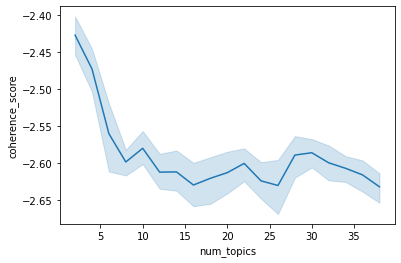

In [56]:
import seaborn as sns
 
ax = sns.lineplot(x="num_topics", y="coherence_score", data=topic_coherence)

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling